# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [1]:
import seaborn as sns
%matplotlib inline
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
sinasc = pd.read_csv('SINASC_RO_2019.csv')
df5 = sinasc[['APGAR1', 'APGAR5', 'SEXO', 'GESTACAO', 'ESTCIVMAE']]
print(sinasc)

       ORIGEM   CODESTAB  CODMUNNASC  LOCNASC  IDADEMAE  ESTCIVMAE  \
0           1  2679477.0      110001        1        19        5.0   
1           1  2679477.0      110001        1        29        2.0   
2           1  2679477.0      110001        1        37        9.0   
3           1  2516500.0      110001        1        30        5.0   
4           1  2516500.0      110001        1        30        2.0   
...       ...        ...         ...      ...       ...        ...   
27023       1  2604388.0      510340        1        32        2.0   
27024       1  2752654.0      510675        1        19        1.0   
27025       1  9659366.0      510787        1        24        2.0   
27026       1  9659366.0      510787        1        21        2.0   
27027       1  2795655.0      510792        1        18        5.0   

                ESCMAE  CODOCUPMAE  QTDFILVIVO  QTDFILMORT  ...  KOTELCHUCK  \
0          8 a 11 anos         NaN         0.0         0.0  ...           5   
1

#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [2]:
apgar5 = sinasc['APGAR5']
apgar5_df = pd.DataFrame(apgar5, columns=['APGAR5'])
apgar5_df.loc[(apgar5_df['APGAR5'] <= 10) & (apgar5_df['APGAR5'] >= 8), 'apgar5_cat'] = 'faixa_normal'
apgar5_df.loc[(apgar5_df['APGAR5'] <= 7) & (apgar5_df['APGAR5'] >= 6), 'apgar5_cat'] = 'asfixia_leve'
apgar5_df.loc[(apgar5_df['APGAR5'] <= 5) & (apgar5_df['APGAR5'] >= 4), 'apgar5_cat'] = 'asfixia_moderada'
apgar5_df.loc[(apgar5_df['APGAR5'] <= 3) & (apgar5_df['APGAR5'] >= 0), 'apgar5_cat'] = 'asfixia_severa'
print(apgar5_df)

       APGAR5    apgar5_cat
0        10.0  faixa_normal
1         9.0  faixa_normal
2        10.0  faixa_normal
3        10.0  faixa_normal
4        10.0  faixa_normal
...       ...           ...
27023     9.0  faixa_normal
27024     9.0  faixa_normal
27025    10.0  faixa_normal
27026     9.0  faixa_normal
27027     8.0  faixa_normal

[27028 rows x 2 columns]


#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

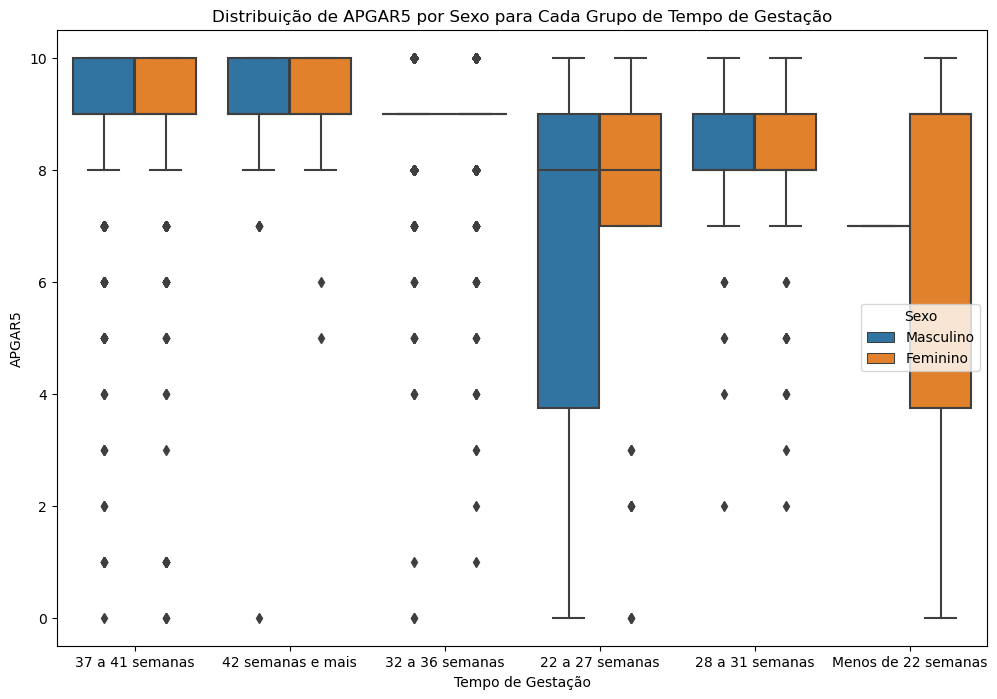

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.boxplot(data=df5, x='GESTACAO', y='APGAR5', hue='SEXO')
plt.xlabel("Tempo de Gestação")
plt.ylabel("APGAR5")
plt.title("Distribuição de APGAR5 por Sexo para Cada Grupo de Tempo de Gestação")
plt.legend(title='Sexo')

plt.show()


####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

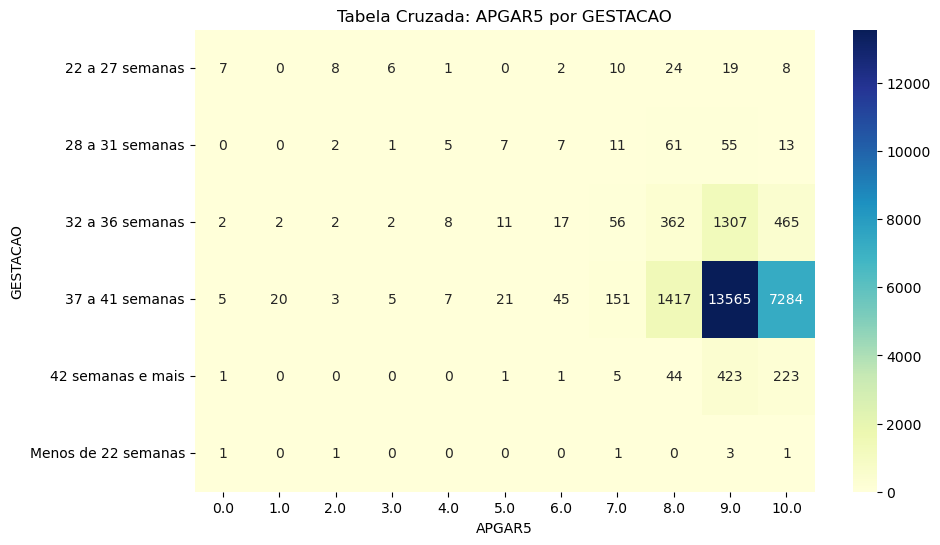

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

tabela_cruzada = pd.crosstab(df5['GESTACAO'], df5['APGAR5'])

plt.figure(figsize=(10, 6))
sns.heatmap(tabela_cruzada, cmap="YlGnBu", annot=True, fmt="d")
plt.xlabel("APGAR5")
plt.ylabel("GESTACAO")
plt.title("Tabela Cruzada: APGAR5 por GESTACAO")
plt.show()


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [7]:
tabela_percentual_linha = tabela_cruzada.apply(lambda row: row / row.sum() * 100, axis=1)

print(tabela_percentual_linha)

APGAR5                    0.0       1.0        2.0       3.0       4.0   \
GESTACAO                                                                  
22 a 27 semanas       8.235294  0.000000   9.411765  7.058824  1.176471   
28 a 31 semanas       0.000000  0.000000   1.234568  0.617284  3.086420   
32 a 36 semanas       0.089526  0.089526   0.089526  0.089526  0.358102   
37 a 41 semanas       0.022200  0.088798   0.013320  0.022200  0.031079   
42 semanas e mais     0.143266  0.000000   0.000000  0.000000  0.000000   
Menos de 22 semanas  14.285714  0.000000  14.285714  0.000000  0.000000   

APGAR5                   5.0       6.0        7.0        8.0        9.0   \
GESTACAO                                                                   
22 a 27 semanas      0.000000  2.352941  11.764706  28.235294  22.352941   
28 a 31 semanas      4.320988  4.320988   6.790123  37.654321  33.950617   
32 a 36 semanas      0.492390  0.760967   2.506714  16.204118  58.504924   
37 a 41 semanas    

####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

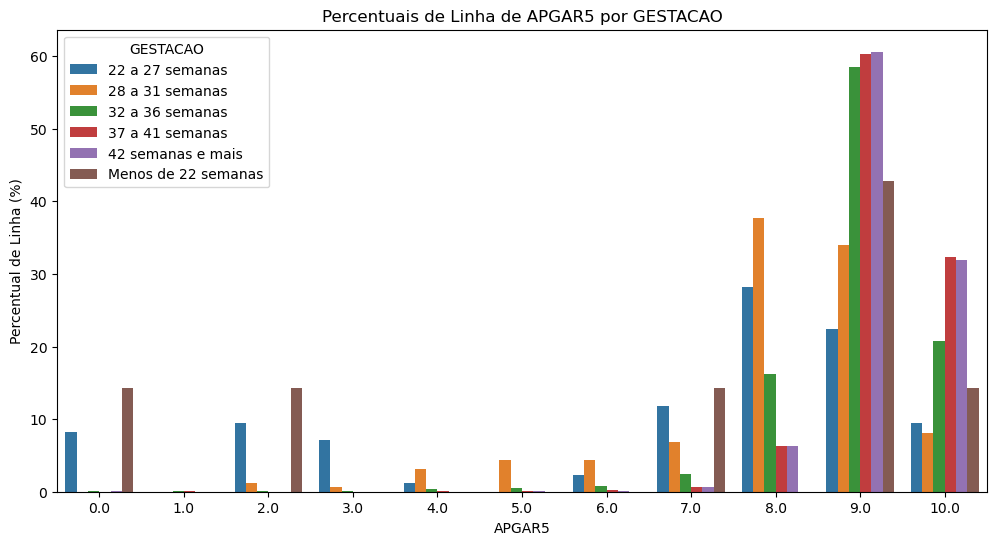

In [2]:
tabela_cruzada = pd.crosstab(df5['GESTACAO'], df5['APGAR5'])
tabela_percentual_linha = tabela_cruzada.div(tabela_cruzada.sum(axis=1), axis=0)*100

tabela_percentual_linha = tabela_percentual_linha.reset_index()
tabela_melted = pd.melt(tabela_percentual_linha, id_vars=['GESTACAO'], value_vars=tabela_percentual_linha.columns[1:],
                       var_name='APGAR5', value_name='Percentual')

plt.figure(figsize=(12, 6))
sns.barplot(data=tabela_melted, x='APGAR5', y='Percentual', hue='GESTACAO')
plt.xlabel("APGAR5")
plt.ylabel("Percentual de Linha (%)")
plt.title("Percentuais de Linha de APGAR5 por GESTACAO")
plt.legend(title='GESTACAO')

plt.show()


#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.